In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

%matplotlib inline

In [10]:
df = pd.read_csv('crypto_prices.csv')

In [11]:
df.head()

,dtime,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
0,2020-09-18,1600387200,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
1,2020-09-17,1600300800,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2,2020-09-16,1600214400,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
3,2020-09-15,1600128000,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
4,2020-09-14,1600041600,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


In [12]:
df.index = df['dtime']

In [13]:
df = df.drop(columns = ['time'])

In [14]:
df.head()

,dtime,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-18,2020-09-18,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,9.294893,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
2020-09-17,2020-09-17,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,9.282689,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2020-09-16,2020-09-16,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,9.275210,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
2020-09-15,2020-09-15,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,9.270494,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
2020-09-14,2020-09-14,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,9.235150,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


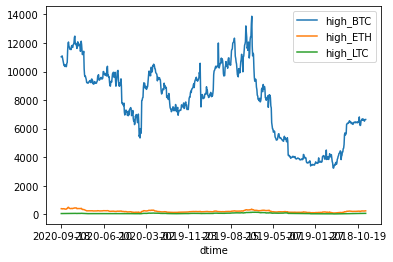

In [15]:
df.plot(y=['high_BTC', 'high_ETH', 'high_LTC'])

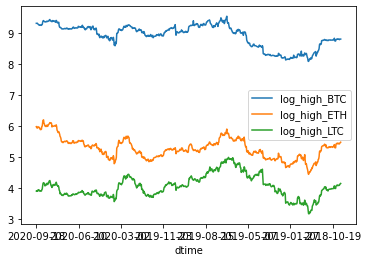

In [16]:
df.plot(y=['log_high_BTC', 'log_high_ETH', 'log_high_LTC'])

The log transformation allows a better view of how the prices move in conjunction. There appears to be a bit of a relationship.

## Daily Returns

Going to calculate the daily return based on the raw high price and the log_high price.

In [17]:
df['BTC_daily_return'] = df['high_BTC'].pct_change()

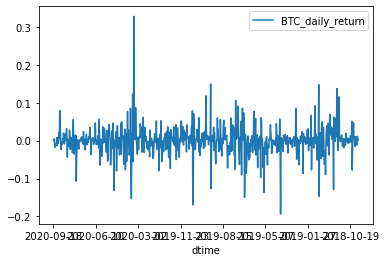

In [18]:
df.plot(y=['BTC_daily_return'])

In [19]:
df['ETH_daily_return'] = df['high_ETH'].pct_change()

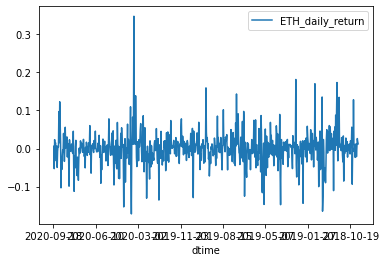

In [20]:
df.plot(y=['ETH_daily_return'])

In [21]:
df['LTC_daily_return'] = df['high_LTC'].pct_change()

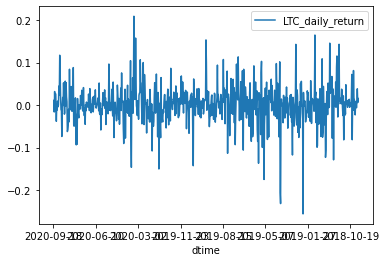

In [22]:
df.plot(y=['LTC_daily_return'])

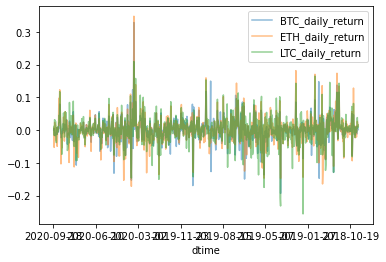

In [24]:
df.plot(y=['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return'],
       alpha=0.5)

Plotting the daily return on the high prices shows the prices move similarly. Later EDA will test if the time-series is stationary or requires transformations to become statationary.

In [25]:
df['BTC_log_return'] = df['log_high_BTC'].pct_change()
df['ETH_log_return'] = df['log_high_ETH'].pct_change()
df['LTC_log_return'] = df['log_high_LTC'].pct_change()

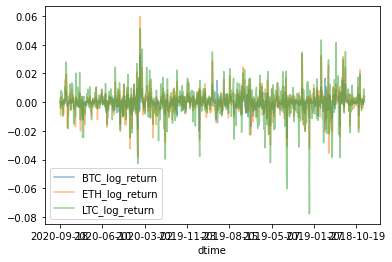

In [26]:
df.plot(y=['BTC_log_return', 'ETH_log_return', 'LTC_log_return'],
       alpha=0.5)

## Histogram of Returns

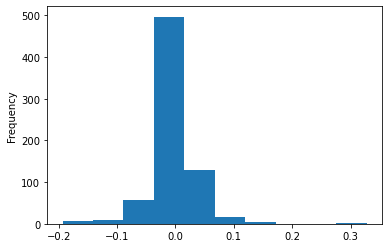

In [33]:
df['BTC_daily_return'].plot.hist()

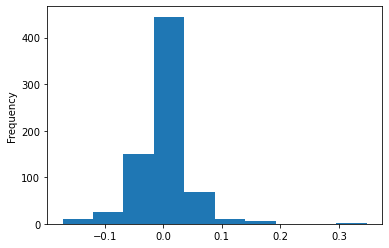

In [34]:
df['ETH_daily_return'].plot.hist()

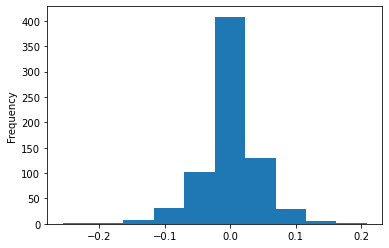

In [35]:
df['LTC_daily_return'].plot.hist()

## Histogram of Daily Log Returns

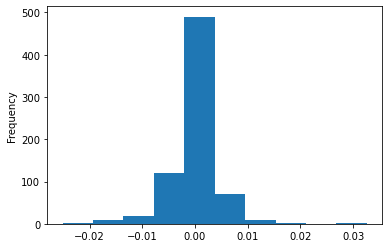

In [36]:
df['BTC_log_return'].plot.hist()

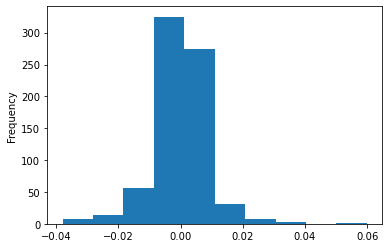

In [37]:
df['ETH_log_return'].plot.hist()

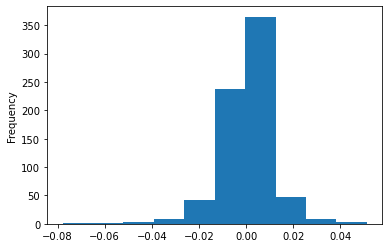

In [38]:
df['LTC_log_return'].plot.hist()

## KDE Plots, daily/log returns

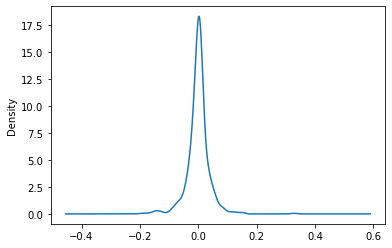

In [42]:
df['BTC_daily_return'].plot.kde()

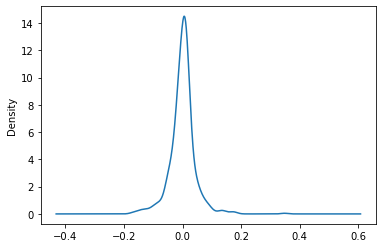

In [43]:
df['ETH_daily_return'].plot.kde()

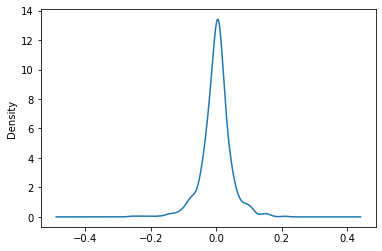

In [44]:
df['LTC_daily_return'].plot.kde()

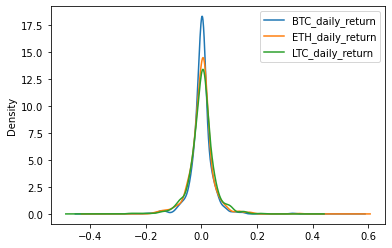

In [45]:
df[['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return']].plot.kde()

Very similar distributions between all three. Fairly uniform with some left skew on LTC and right skew on ETH.

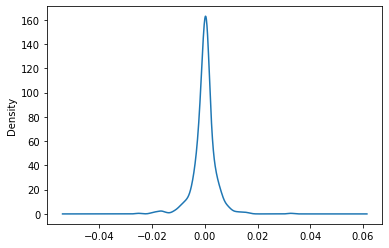

In [46]:
df['BTC_log_return'].plot.kde()

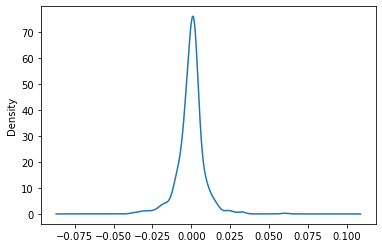

In [47]:
df['ETH_log_return'].plot.kde()

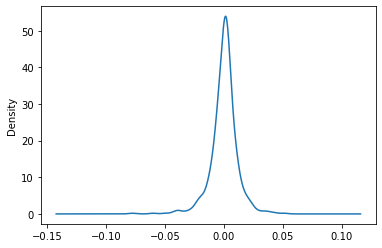

In [48]:
df['LTC_log_return'].plot.kde()

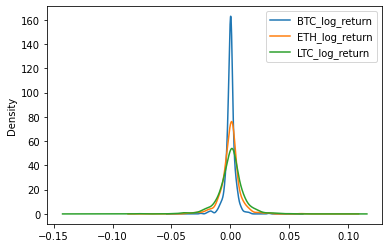

In [49]:
df[['BTC_log_return', 'ETH_log_return', 'LTC_log_return']].plot.kde()

## Boxplots of Daily/Log Returns

Might take out the boxplot

c:\users\pam\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\users\pam\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\users\pam\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\users\pam\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x10118f88>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x10127310>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x10118dd8>,
 'medians': [<matplotlib.lines.Line2D at 0x10127670>,
 'fliers': [<matplotlib.lines.Line2D at 0x101277f0>,
 'means': []}

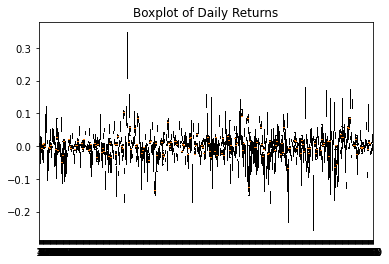

In [50]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Daily Returns')
ax1.boxplot(df[['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return']])

## Volume

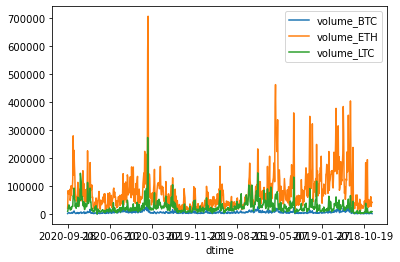

In [28]:
df.plot(y=['volume_BTC', 'volume_ETH', 'volume_LTC'])

ETH volume has more volatility than BTC and LTC. Could be something worth investigating.

May want to do some more with this?

## Experimenting with Pandas Lag Plot

In [51]:
from pandas.plotting import lag_plot

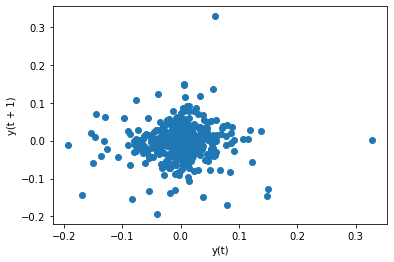

In [53]:
lag_plot(df['BTC_daily_return'])

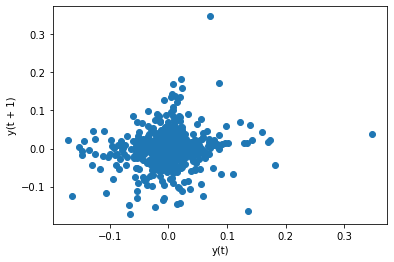

In [54]:
lag_plot(df['ETH_daily_return'])

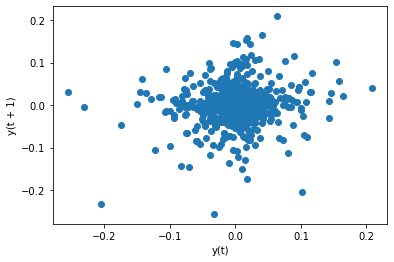

In [55]:
lag_plot(df['LTC_daily_return'])

Lag plots for log returns

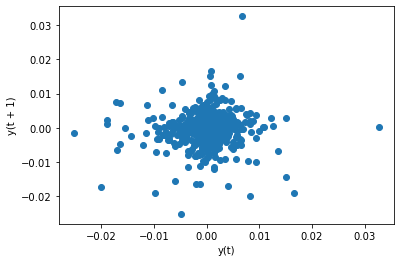

In [56]:
lag_plot(df['BTC_log_return'])

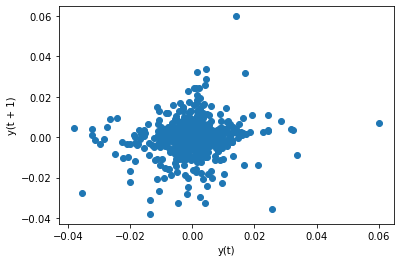

In [57]:
lag_plot(df['ETH_log_return'])

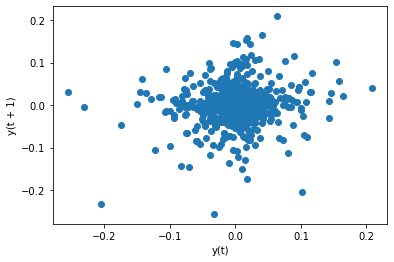

In [58]:
lag_plot(df['LTC_daily_return'])